In [2]:
import pandas as pb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [7]:
with open("./data_processed.pickle", 'rb') as fp:
    data_processed = pickle.load(fp)

In [9]:
data_processed.columns

Index(['temp_weeklyMin', 'hum_weeklyMin', 'wind_weeklyMin', 'precip_weeklyMin',
       'temp_weeklyMax', 'hum_weeklyMax', 'wind_weeklyMax', 'precip_weeklyMax',
       'temp_weeklyMean', 'hum_weeklyMean', 'wind_weeklyMean',
       'precip_weeklyMean', 'temp_weeklyMedian', 'weekly_infections'],
      dtype='object')

In [10]:
data_processed_min = data_processed[['temp_weeklyMin', 'hum_weeklyMin', 'wind_weeklyMin', 'precip_weeklyMin']]

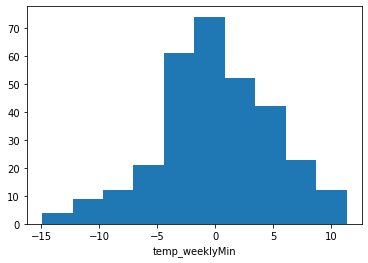

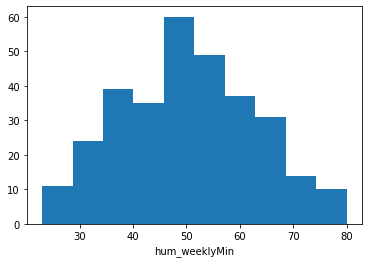

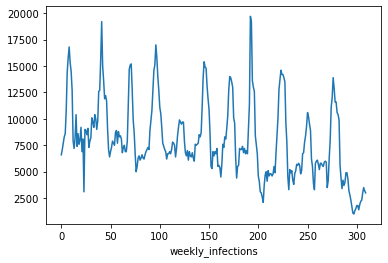

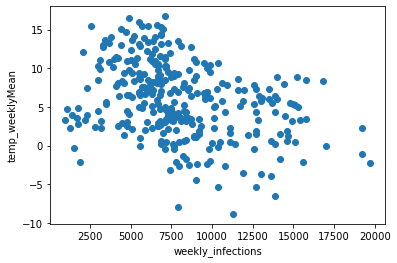

In [21]:
for i in ["temp_weeklyMin", "hum_weeklyMin"]:
    plt.hist(data_processed_min.reset_index()[i])
    plt.xlabel(i)
    plt.show()
plt.plot(data_processed.reset_index().weekly_infections)
plt.xlabel("weekly_infections")
plt.show()
plt.scatter(data_processed.reset_index().weekly_infections, data_processed.reset_index().temp_weeklyMean)
plt.xlabel("weekly_infections")
plt.ylabel("temp_weeklyMean")
plt.show()

In [30]:
df = data_processed.reset_index()
df_test = df[((df.week > 25) & (df.year == 2020)) | (df.year>2020)]

In [39]:
train = df[~df.isin(df_test)].dropna()

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train.drop("weekly_infections", axis=1).reset_index(), train.reset_index().weekly_infections, test_size=0.2, shuffle=True, random_state=24)



In [63]:
X_train

,index,year,week,temp_weeklyMin,hum_weeklyMin,wind_weeklyMin,precip_weeklyMin,temp_weeklyMax,hum_weeklyMax,wind_weeklyMax,precip_weeklyMax,temp_weeklyMean,hum_weeklyMean,wind_weeklyMean,precip_weeklyMean,temp_weeklyMedian
109,109,2013.0,46.0,0.7,60.0,1.0,0.0,8.9,99.0,4.0,15.3,5.457143,84.285714,1.952381,2.342857,5.457143
146,146,2015.0,8.0,-2.5,48.0,1.0,0.0,9.4,99.0,4.0,3.1,3.138095,78.714286,1.904762,0.442857,3.138095
72,72,2012.0,10.0,-4.1,39.0,1.0,0.0,11.4,100.0,5.0,15.3,4.304762,65.047619,2.523810,2.942857,4.304762
64,64,2012.0,2.0,0.1,51.0,3.0,0.4,9.1,97.0,4.0,15.3,4.542857,69.047619,3.714286,8.028571,4.542857
61,61,2011.0,51.0,-2.6,51.0,1.0,0.0,9.1,100.0,5.0,15.3,3.223810,79.142857,2.523810,6.971429,3.223810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,207,2017.0,41.0,8.7,42.0,0.0,0.0,21.7,96.0,4.0,15.3,14.695238,68.190476,2.428571,2.200000,14.695238
123,123,2014.0,10.0,2.4,41.0,1.0,0.0,11.9,100.0,4.0,15.3,6.904762,70.666667,2.428571,4.628571,6.904762
129,129,2014.0,41.0,9.7,54.0,0.0,0.0,21.6,97.0,4.0,15.3,15.509524,84.095238,1.952381,2.185714,15.509524
145,145,2015.0,7.0,-1.0,55.0,2.0,0.0,8.3,98.0,6.0,17.2,3.304762,81.523810,3.190476,2.500000,3.304762


In [64]:
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [65]:
r2_score.__name__

'r2_score'

In [58]:
def compare_methods(method_classes, metric_functions,X_train,y_train,X_valid, y_valid):
    """ 
    Run the provided methods in method_classes on the provided data and evaluate
    them using the provided metric_functions. Calculate all metric functions
    for each provided method.
    
    Returns
    --------
    scores: Dictionary with names (strings) as keys (method+metric name) and 
            the calculated performance metric values as values.
    """

    scores = {} # dict of metric name -> metric value/score

    for model in method_classes:
        trained_model = model.fit(X_train, y_train)
        y_pred = trained_model.predict(X_valid)
        for metric in metric_functions:
            metric_result = metric(y_true, y_pred)
            scores[metric.__name__] = metric_result
    # you can also print the results in this function, if you want to format them more nicely!
    return scores

In [56]:
suitable_metrics = []
suitable_metrics.append(r2_score)
suitable_metrics.append(mean_absolute_error)    
suitable_metrics.append(mean_squared_error)

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
suitable_methods = []
suitable_methods.append(LinearRegression)
suitable_methods.append(ElasticNetCV)
suitable_methods.append(DecisionTreeRegressor)

In [66]:
model_scores = compare_methods(suitable_methods, suitable_metrics, X_train, y_train, X_valid, y_valid)
print_scores(model_scores)

TypeError: fit() missing 1 required positional argument: 'y'

In [74]:
LinearRegression.fit(X_train, y_train.values)

TypeError: fit() missing 1 required positional argument: 'y'

In [71]:
X_train

,index,year,week,temp_weeklyMin,hum_weeklyMin,wind_weeklyMin,precip_weeklyMin,temp_weeklyMax,hum_weeklyMax,wind_weeklyMax,precip_weeklyMax,temp_weeklyMean,hum_weeklyMean,wind_weeklyMean,precip_weeklyMean,temp_weeklyMedian
109,109,2013.0,46.0,0.7,60.0,1.0,0.0,8.9,99.0,4.0,15.3,5.457143,84.285714,1.952381,2.342857,5.457143
146,146,2015.0,8.0,-2.5,48.0,1.0,0.0,9.4,99.0,4.0,3.1,3.138095,78.714286,1.904762,0.442857,3.138095
72,72,2012.0,10.0,-4.1,39.0,1.0,0.0,11.4,100.0,5.0,15.3,4.304762,65.047619,2.523810,2.942857,4.304762
64,64,2012.0,2.0,0.1,51.0,3.0,0.4,9.1,97.0,4.0,15.3,4.542857,69.047619,3.714286,8.028571,4.542857
61,61,2011.0,51.0,-2.6,51.0,1.0,0.0,9.1,100.0,5.0,15.3,3.223810,79.142857,2.523810,6.971429,3.223810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,207,2017.0,41.0,8.7,42.0,0.0,0.0,21.7,96.0,4.0,15.3,14.695238,68.190476,2.428571,2.200000,14.695238
123,123,2014.0,10.0,2.4,41.0,1.0,0.0,11.9,100.0,4.0,15.3,6.904762,70.666667,2.428571,4.628571,6.904762
129,129,2014.0,41.0,9.7,54.0,0.0,0.0,21.6,97.0,4.0,15.3,15.509524,84.095238,1.952381,2.185714,15.509524
145,145,2015.0,7.0,-1.0,55.0,2.0,0.0,8.3,98.0,6.0,17.2,3.304762,81.523810,3.190476,2.500000,3.304762


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler